In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# =========================
# Load JSON files
# =========================
with open("dynamic_metrics.json") as f:
    dynamic = json.load(f)

with open("ewc_metrics.json") as f:
    ewc = json.load(f)

with open("replay_metrics.json") as f:
    replay = json.load(f)


In [3]:
# =========================
# Extract Accuracy & Forgetting
# =========================

def extract_stream_metrics(data):
    acc = data["Top1_Acc_Stream/eval_phase/test_stream/Task000"][1] \
        if "Top1_Acc_Stream/eval_phase/test_stream/Task000" in data \
        else data["Top1_Acc_Stream/eval_phase/test_stream/Task002"][1]

    forgetting = data["StreamForgetting/eval_phase/test_stream"][1]
    return np.array(acc), np.array(forgetting)

acc_dyn, forget_dyn = extract_stream_metrics(dynamic)
acc_ewc, forget_ewc = extract_stream_metrics(ewc)
acc_rep, forget_rep = extract_stream_metrics(replay)

experiences = np.arange(1, len(acc_dyn) + 1)


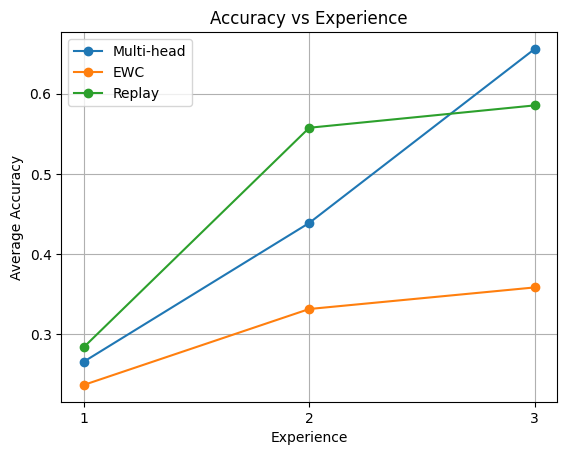

In [4]:
# =========================
# Accuracy vs Experience
# =========================
plt.figure()
plt.plot(experiences, acc_dyn, marker='o')
plt.plot(experiences, acc_ewc, marker='o')
plt.plot(experiences, acc_rep, marker='o')

plt.xlabel("Experience")
plt.ylabel("Average Accuracy")
plt.title("Accuracy vs Experience")
plt.legend(["Multi-head", "EWC", "Replay"])
plt.xticks(experiences)
plt.grid(True)
plt.show()


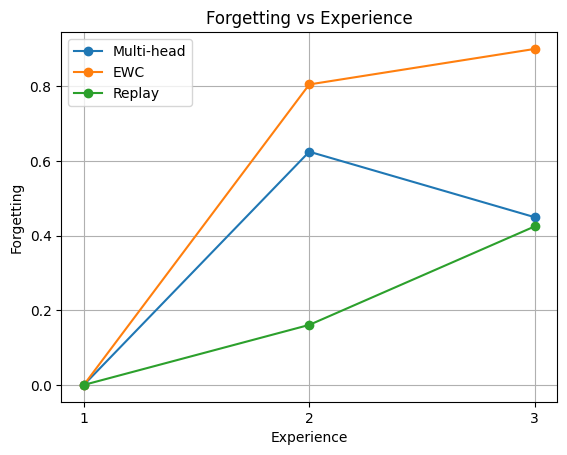

In [5]:
# =========================
# Forgetting vs Experience
# =========================
plt.figure()
plt.plot(experiences, forget_dyn, marker='o')
plt.plot(experiences, forget_ewc, marker='o')
plt.plot(experiences, forget_rep, marker='o')

plt.xlabel("Experience")
plt.ylabel("Forgetting")
plt.title("Forgetting vs Experience")
plt.legend(["Multi-head", "EWC", "Replay"])
plt.xticks(experiences)
plt.grid(True)
plt.show()


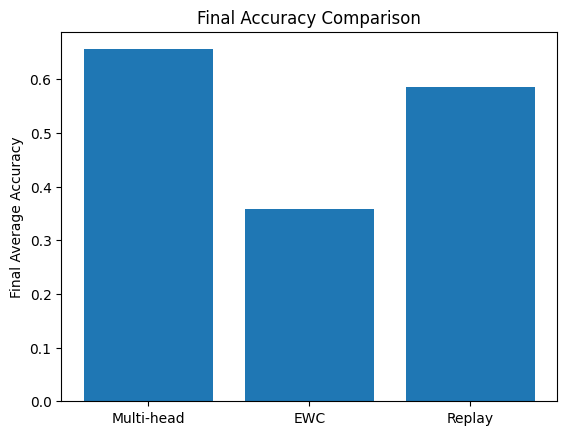

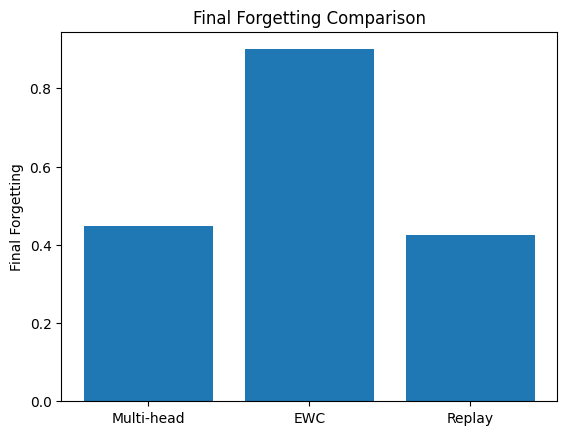

In [6]:
# =========================
# Final Performance Bar Charts
# =========================
methods = ["Multi-head", "EWC", "Replay"]

final_acc = [acc_dyn[-1], acc_ewc[-1], acc_rep[-1]]
final_forgetting = [forget_dyn[-1], forget_ewc[-1], forget_rep[-1]]

# Final Accuracy
plt.figure()
plt.bar(methods, final_acc)
plt.ylabel("Final Average Accuracy")
plt.title("Final Accuracy Comparison")
plt.show()

# Final Forgetting
plt.figure()
plt.bar(methods, final_forgetting)
plt.ylabel("Final Forgetting")
plt.title("Final Forgetting Comparison")
plt.show()


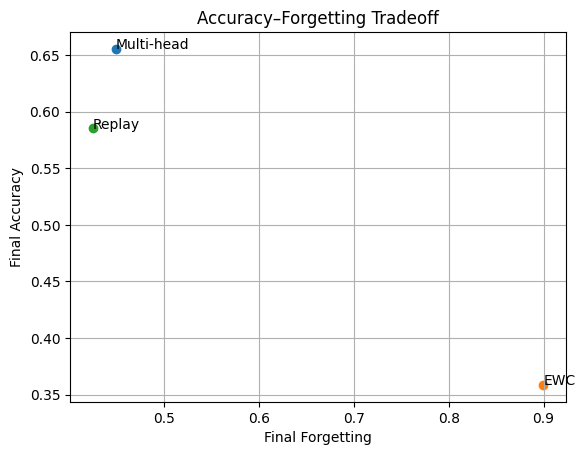

In [7]:
# =========================
# Accuracy–Forgetting Tradeoff
# =========================
plt.figure()

plt.scatter(final_forgetting[0], final_acc[0])
plt.scatter(final_forgetting[1], final_acc[1])
plt.scatter(final_forgetting[2], final_acc[2])

plt.xlabel("Final Forgetting")
plt.ylabel("Final Accuracy")
plt.title("Accuracy–Forgetting Tradeoff")

for i, method in enumerate(methods):
    plt.annotate(method, (final_forgetting[i], final_acc[i]))

plt.grid(True)
plt.show()
